# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: The t-test family
### VIDEO: One-sample t-test
#### TEACHER: Mike X Cohen, sincxpress.com

In [14]:
# import libraries
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

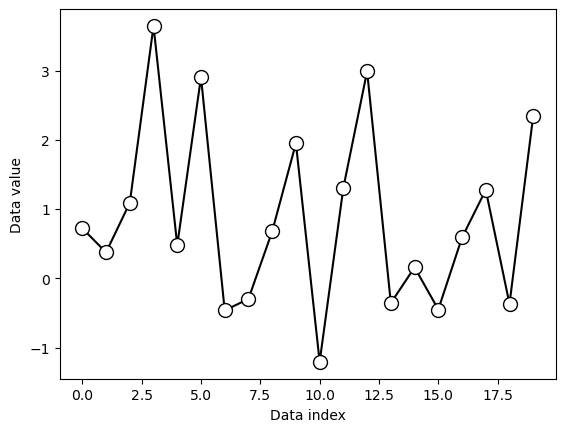

In [15]:
# generate the data
rng = np.random.default_rng()

# parameters
N = 20  # sample size
popMu = 0.5  # true population mean
data = rng.normal(loc=0.5, scale=1, size=N)
# data = np.random.randn(N) + popMu

# let's see what the data look(s) like
plt.plot(data, 'ko', markerfacecolor='w', markersize=10)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.show()

# question: Should there be lines in this plot?
# Строго говоря, мы не имеем права проводить линии между точками данных.
# У нас нет никаких сведений о значении условной функции data
# на отрезке между двумя точками, соединенными линией.

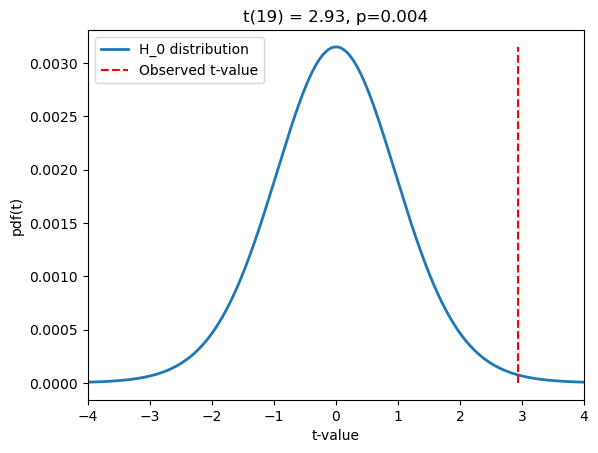

In [18]:
# "manual" t-test

# the null-hypothesis value
H0val = 0

# compute the t-value
t_num = np.mean(data) - H0val
t_den = np.std(data, ddof=1) / np.sqrt(N)
tval = t_num / t_den

# degrees of freedom
df = N-1

# p-value
pval1 = 1 - stats.t.cdf(np.abs(tval), df)  # 1-tail t-test
pval2 = 2*(1 - stats.t.cdf(np.abs(tval), df))  # 2-tail t-test

# show the H0 parameter distribution and observed t-value
x = np.linspace(-4, 4, 1001)
# To transform pdf into pmf (analyic to discrete),
# stats.t.pdf(x, df) is scaled by np.mean(np.diff(x)) [or x[1] - x[0]]
# It's some sort of computational hack, this way we make sure that cumsum goes to 1
tdist = stats.t.pdf(x, df) * np.mean(np.diff(x))

plt.plot(x, tdist, linewidth=2)
plt.plot([tval, tval], [0, np.max(tdist)], 'r--')
plt.legend(('H_0 distribution', 'Observed t-value'))
plt.xlim([-4, 4])
plt.xlabel('t-value')
plt.ylabel('pdf(t)')
plt.title(f't({df}) = {np.round(tval, 3)}, p={np.round(pval1, 3)}')
plt.show()

In [20]:
# now using the Python function

# 2-tail t-test by default
t, p = stats.ttest_1samp(data, H0val)
# It tests +tval and -tval
# Meaning:
# p value = stats.t.cdf(-t value, df) + (1 - stats.t.cdf(+t value, df))

# Conducting 1-tail test:
t, p = stats.ttest_1samp(a=data, popmean=H0val, alternative='greater')
# Comparison with manual results
print('1 sample t-test using:')
print('built-in function:', t, p)
print('manual code:', tval, pval1)
# do these values match our manually computed values?

1 sample t-test using:
built-in function: 2.9300828580260596 0.0042954470705679265
manual code: 2.9300828580260596 0.004295447070567948
